In [19]:
import json
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

# Opening JSON file
f = open("ESP_json.db")
  
# returns JSON object as 
# a dictionary
data = json.load(f)
f.close()


ID = '737'

# Iterating through the json
# list

#for i in data:
#    print(f'{i:-^50}')
#    for j in data[i]:
#        print(j,"=",data[i][j])

for j in data[ID]:
    print(j,"=",data[ID][j])

def ESP_Head(ID,Q):
    Head = []    
    cs = CubicSpline(data[ID]['rate_points'], data[ID]['head_points'])
    cs_extrapol = CubicSpline(data[ID]['rate_points'][-2:], data[ID]['head_points'][-2:])
    
    
    for i in range(len(Q)):
        if Q[i] <= data[ID]['rate_max_sm3day']:
            Head.append(cs(Q[i])*1)
        if Q[i] > data[ID]['rate_max_sm3day']:
            Head.append(cs_extrapol(Q[i])*1)
    return Head


#ESP_Head(ID,50)

ID = 737
source = legacy
manufacturer = Generic
name = ЭЦН5-125
stages_max = 517
rate_nom_sm3day = 125
rate_opt_min_sm3day = 80
rate_opt_max_sm3day = 160
rate_max_sm3day = 230
slip_nom_rpm = 2910
freq_Hz = 50
eff_max = 0.55
height_stage_m = 0.039
Series = 5
d_od_mm = 92
d_cas_min_mm = 121.7
d_shaft_mm = 17
area_shaft_mm2 = 227
power_limit_shaft_kW = 72
power_limit_shaft_high_kW = 120
power_limit_shaft_max_kW = 150
pressure_limit_housing_atma = 390
d_motor_od_mm = 103
rate_points = [0, 20, 40, 60, 80, 100, 120, 125, 140, 160, 180, 200, 220, 230]
head_points = [6.7, 6.72, 6.7, 6.69, 6.6, 6.43, 5.92, 5.8, 5.12, 4.1, 2.99, 1.9, 0.73, 0]
power_points = [0.106, 0.113, 0.12, 0.126, 0.133, 0.14, 0.147, 0.148, 0.154, 0.161, 0.169, 0.1725, 0.1692, 0.1621]
eff_points = [0, 0.14, 0.25, 0.36, 0.46, 0.52, 0.55, 0.55, 0.53, 0.46, 0.36, 0.24, 0.1, 0]


покажем характеристики ЭЦН на графике

ESP_ID = 737
rate_points = [0, 20, 40, 60, 80, 100, 120, 125, 140, 160, 180, 200, 220, 230]
head_points = [6.7, 6.72, 6.7, 6.69, 6.6, 6.43, 5.92, 5.8, 5.12, 4.1, 2.99, 1.9, 0.73, 0]


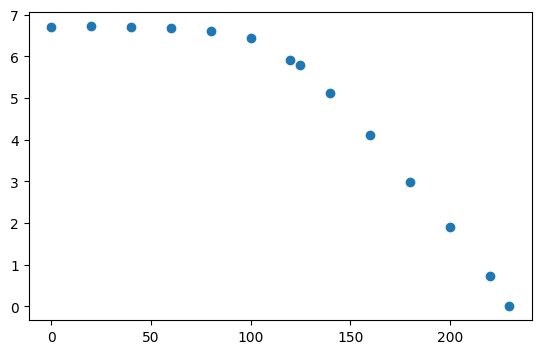

In [2]:
print("ESP_ID = {}".format(ID))
print("rate_points = {}".format(data[ID]['rate_points']))
print("head_points = {}".format(data[ID]['head_points']))

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(data[ID]['rate_points'], data[ID]['head_points'], 'o', label='data')


C:\Users\leone\AppData\Local\Temp\ipykernel_2840\578126633.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6.5, 4))


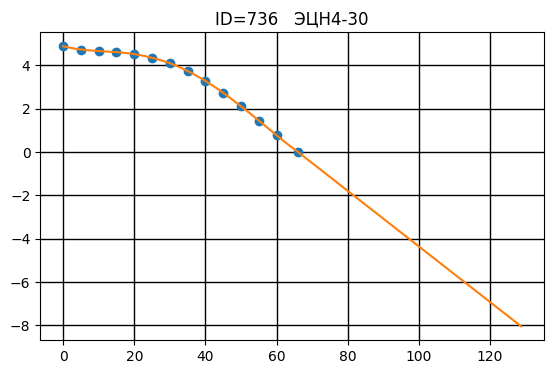

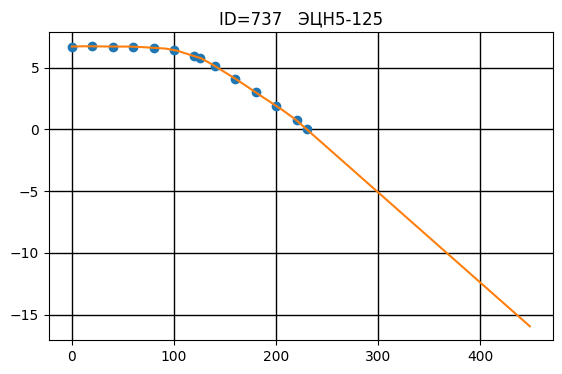

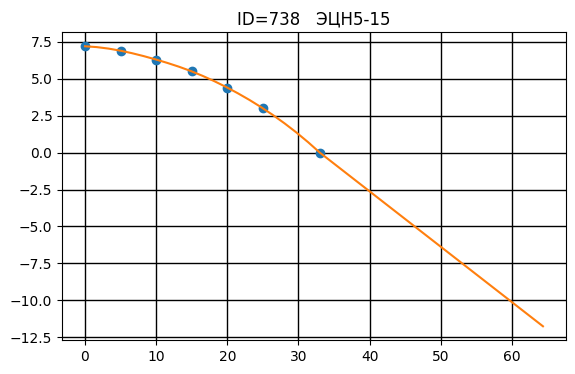

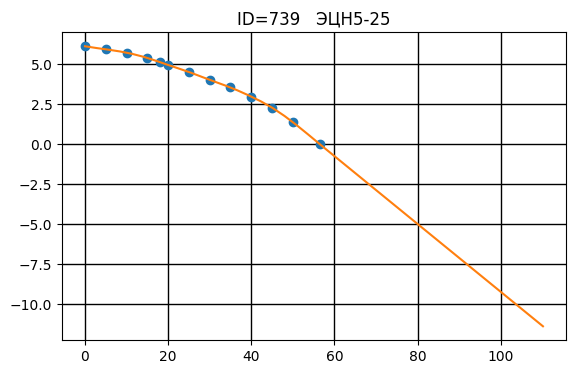

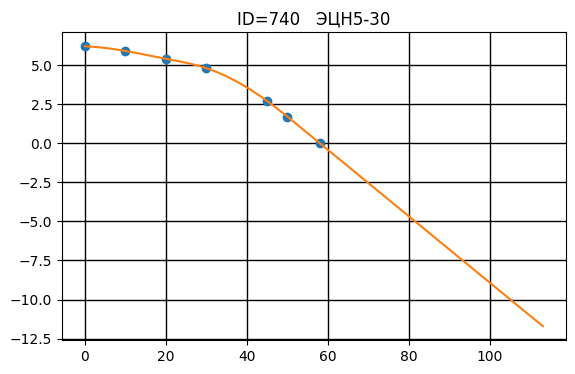

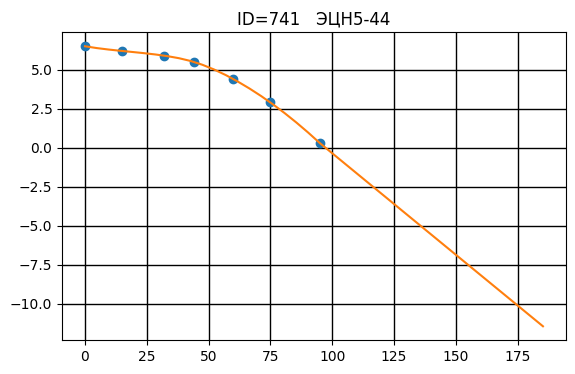

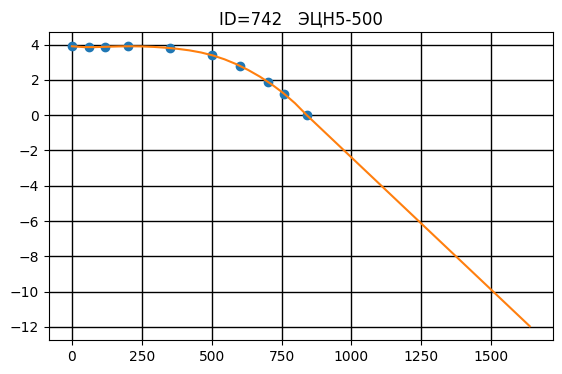

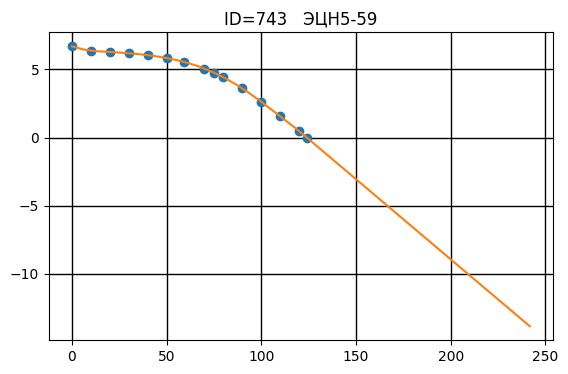

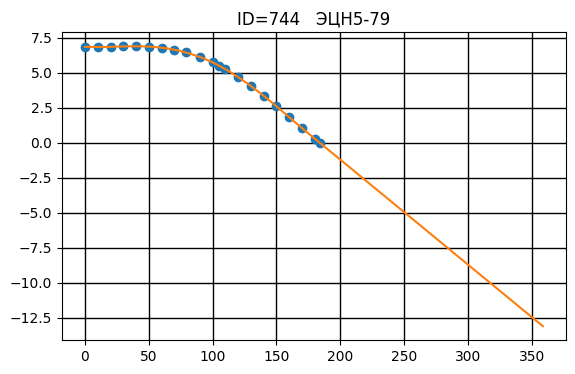

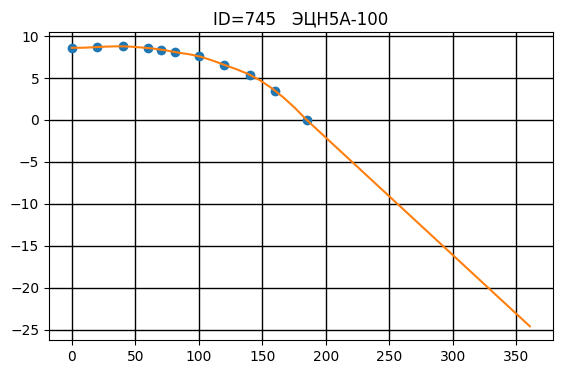

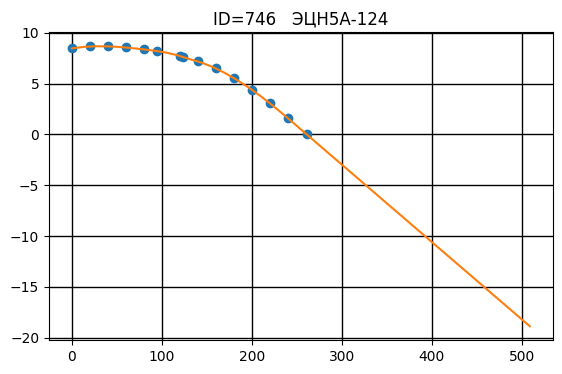

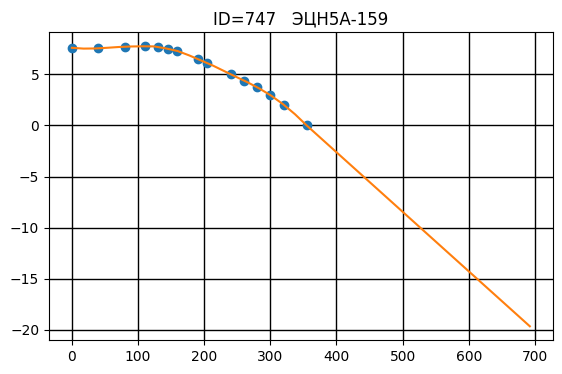

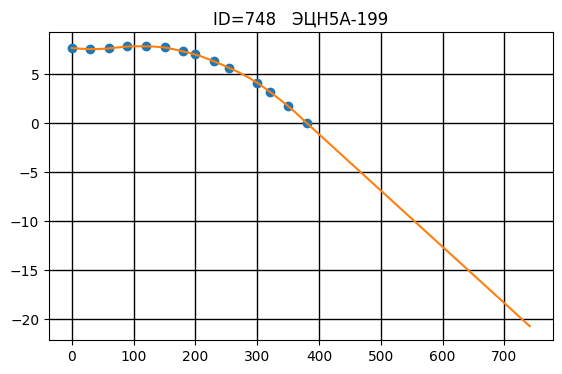

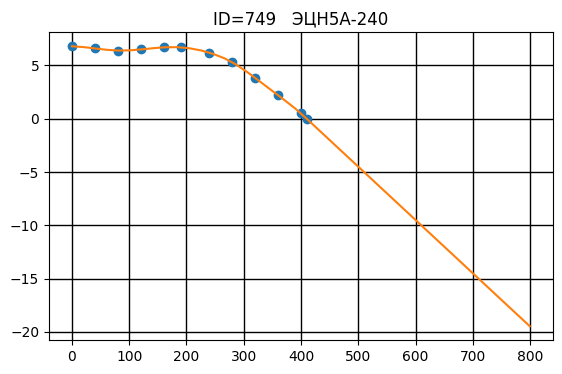

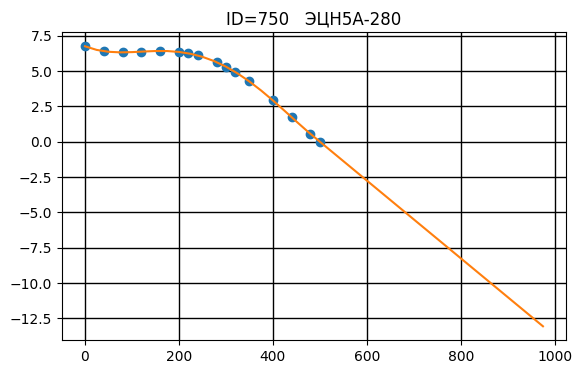

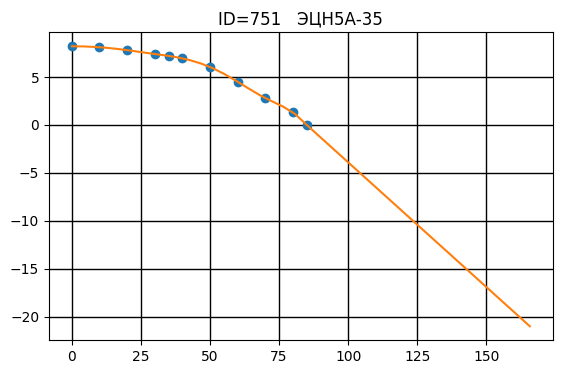

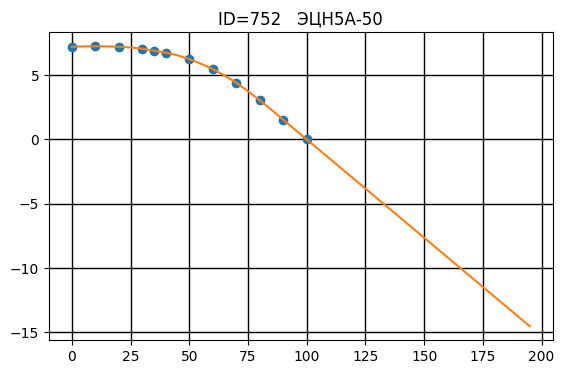

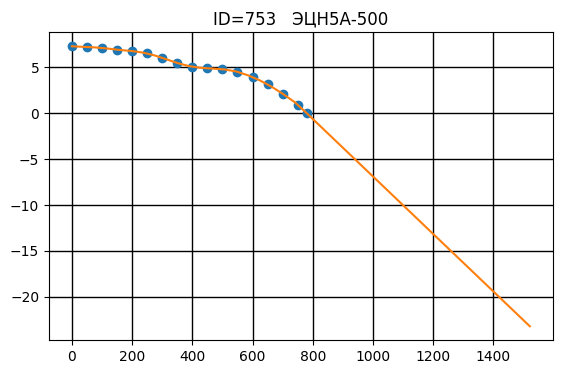

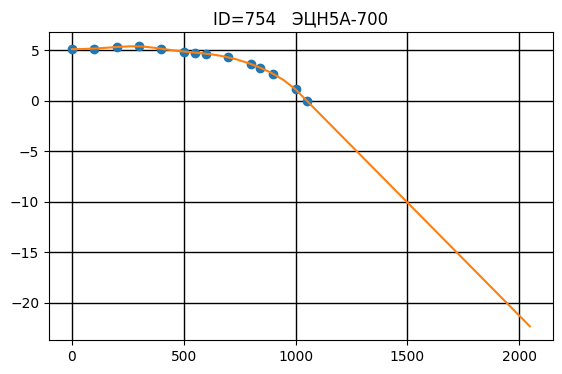

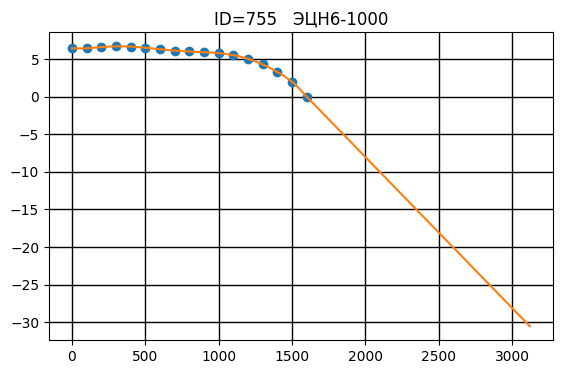

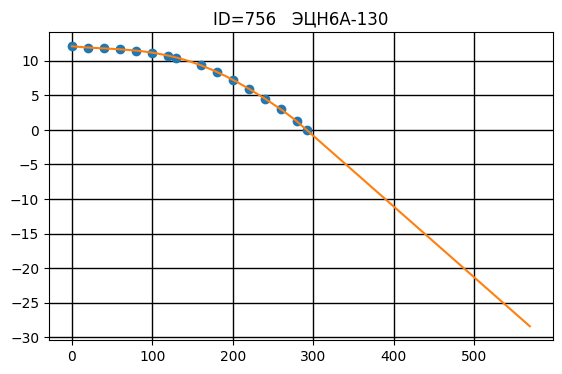

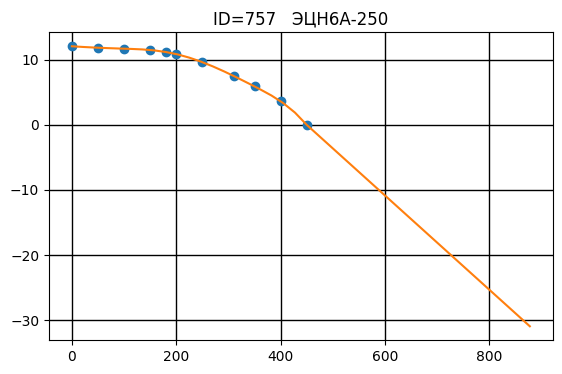

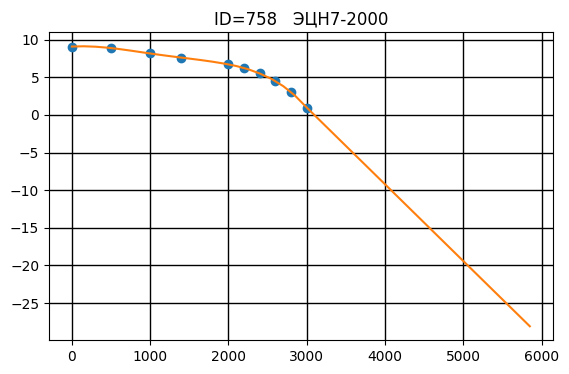

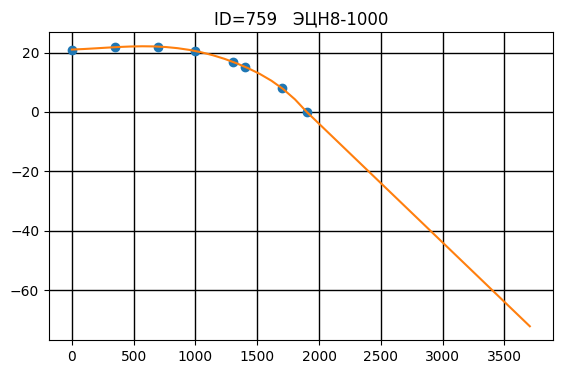

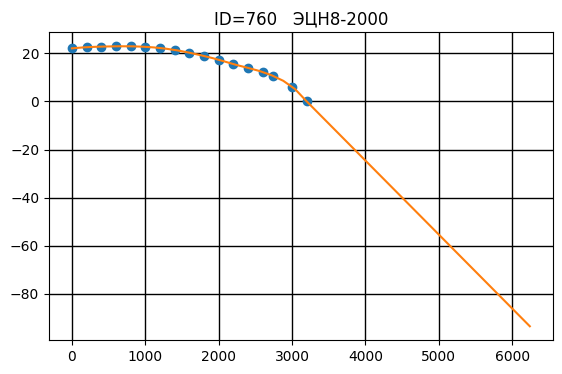

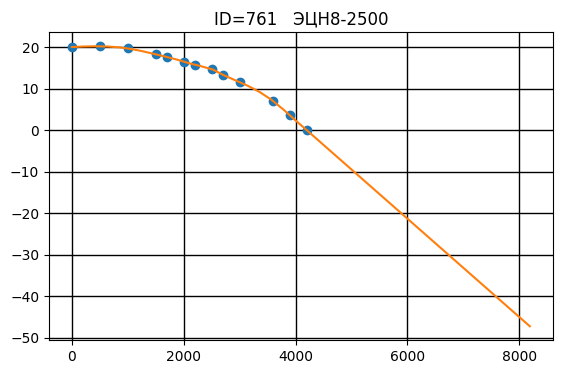

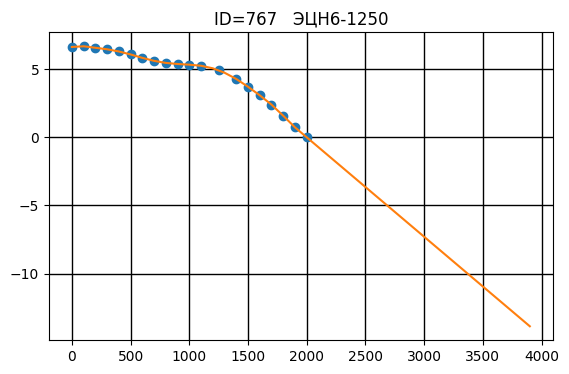

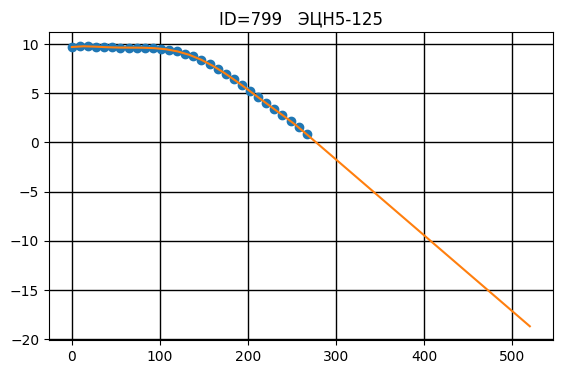

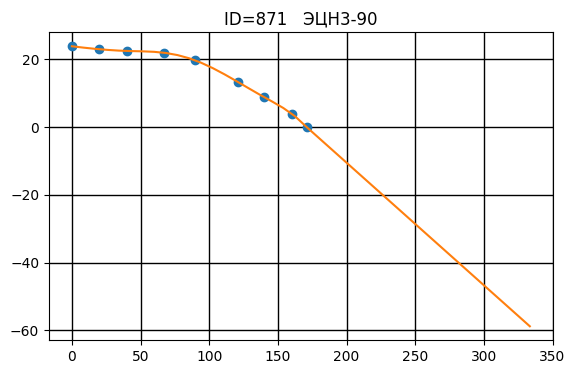

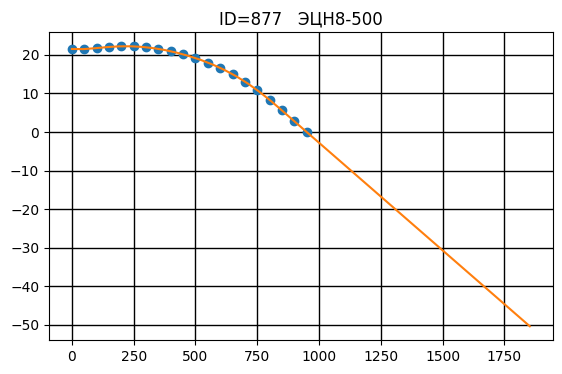

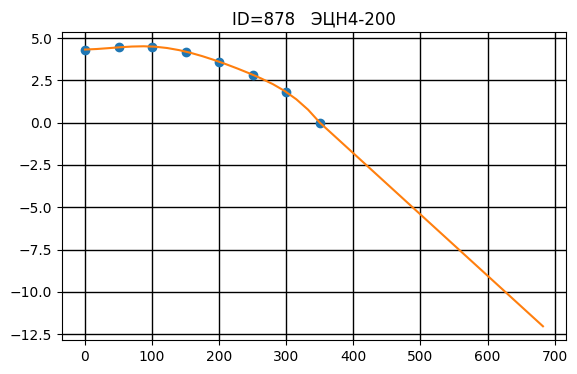

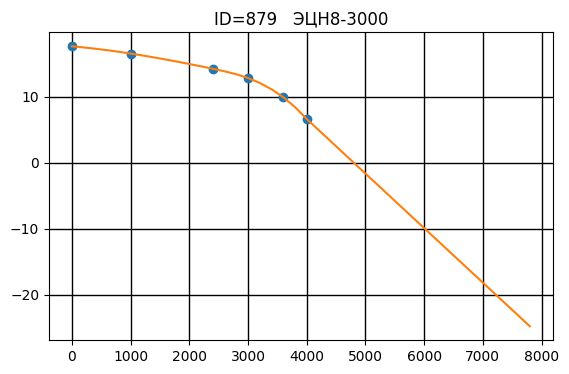

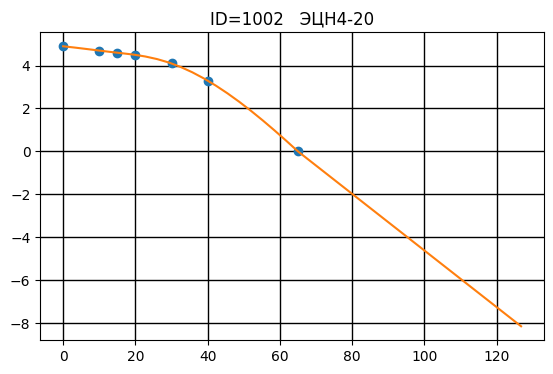

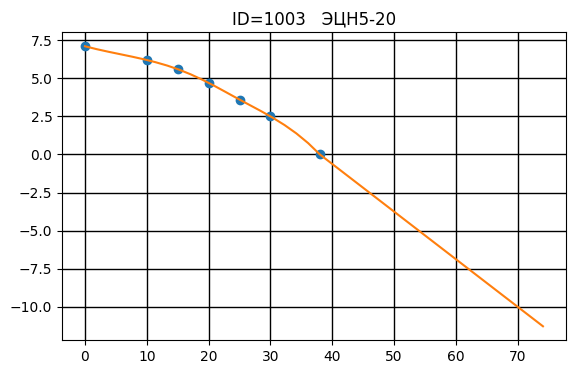

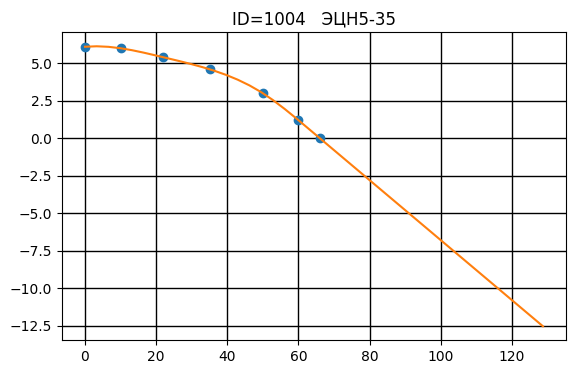

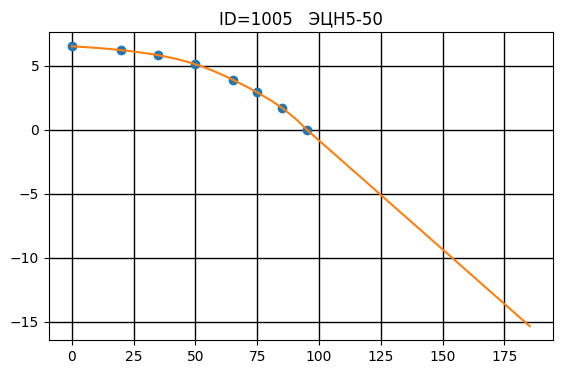

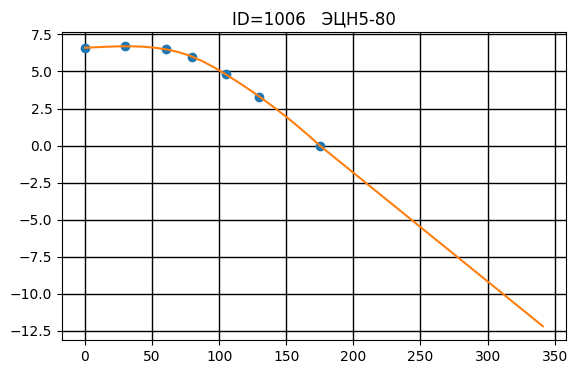

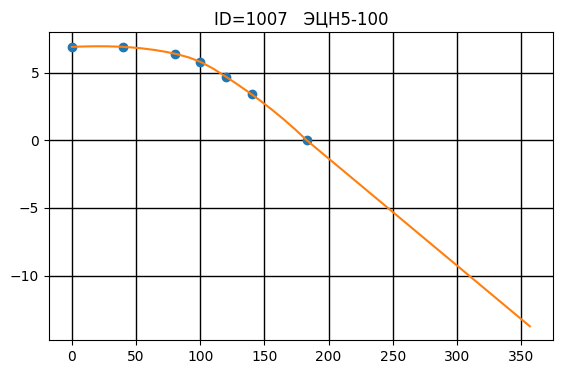

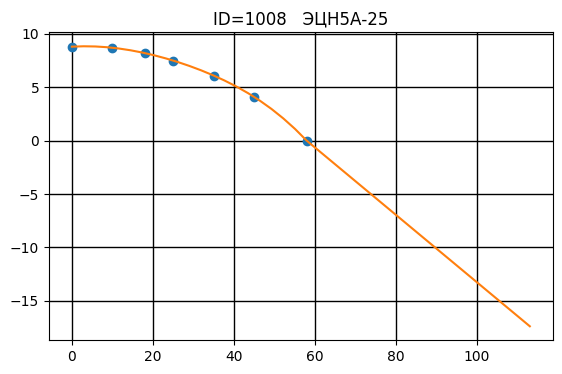

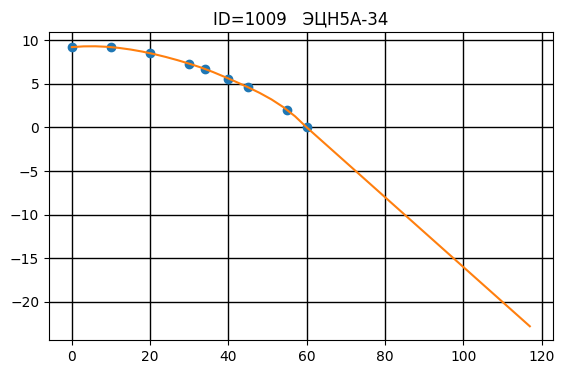

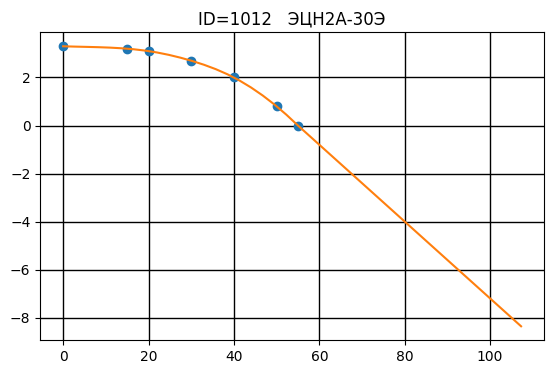

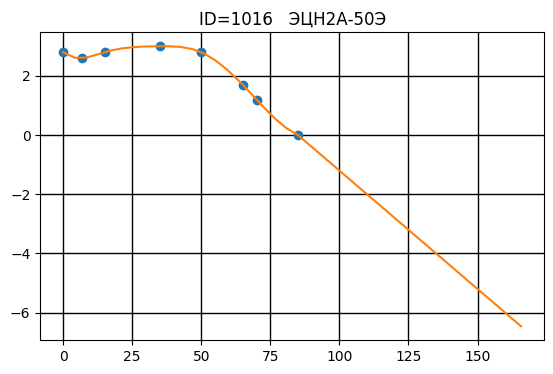

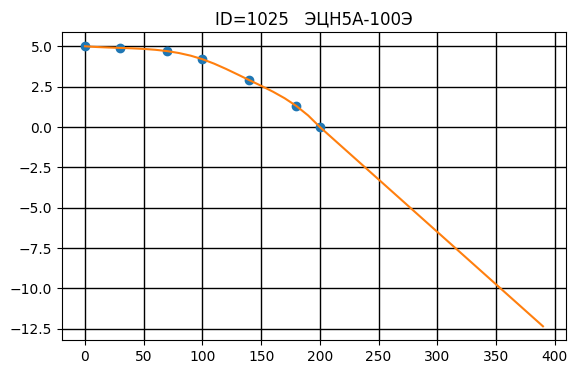

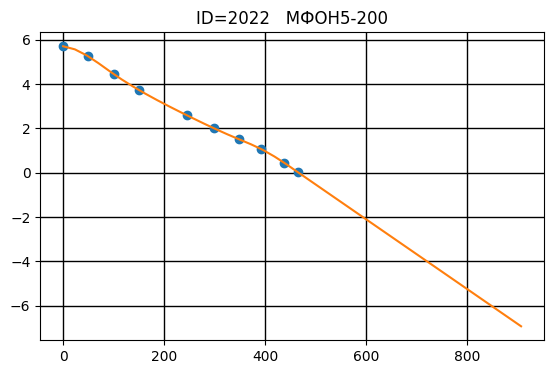

In [20]:
# 
del ID
for ID in data:
    
    #ID = '743'
    Q_max = data[ID]['rate_max_sm3day']
    Q = np.arange(0, Q_max*2, Q_max/20)
    #print(Q)

    H = ESP_Head(ID,Q)
    
    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(data[ID]['rate_points'], data[ID]['head_points'], 'o', label='data')
    ax.plot(Q, H, '-', label='data')
    ax.set_title('ID={}   {}'.format(ID,data[ID]['name']))
    ax.grid(which='major',
            color = 'k',
            linewidth = 1)

In [12]:
print(Q)

print(Q[-2:])
len(Q)

print(H[:2])


[  0.    23.25  46.5   69.75  93.   116.25 139.5  162.75 186.   209.25
 232.5  255.75 279.   302.25 325.5  348.75 372.   395.25 418.5  441.75
 465.   488.25 511.5  534.75 558.   581.25 604.5  627.75 651.   674.25]
[651.   674.25]
[array(5.7), array(5.56140827)]
